In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Neuro_Shit.Plotting import *

/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
mapping = load_mapping('destr_mapping.txt')

lh, rh, label_names, fs_avg = get_setup(fs_home='/mnt/sda5/freesurfer', # Your fs dr
                                        destr=True,  # This is the only option right now
                                        fs5=True) # Change to false for fsaverage

In [3]:
data_loc = '/home/sage/betas_figures.xlsx'
data = pd.read_excel(data_loc, sheet_name=0)

In [4]:
keys = ['area_', 'thick_', 'dmri_dti_full_fa_wm_cort_', 'dmri_dti_full_md_wm_cort_']

In [5]:
# This function is going through and getting the lh and rh surfaces for each key

all_surfs = []
for key in keys:
    
    chunk = get_chunk_from_df(data, name_col='ROI', value_col='Beta', keys=[key])
    print(len(chunk))
    
    surfaces = get_hemi_surfaces(chunk, '_lh', '_rh', lh, rh, label_names, mapping)
    
    all_surfs.append(surfaces)

100
97
75
78


## Multi-Collage Example

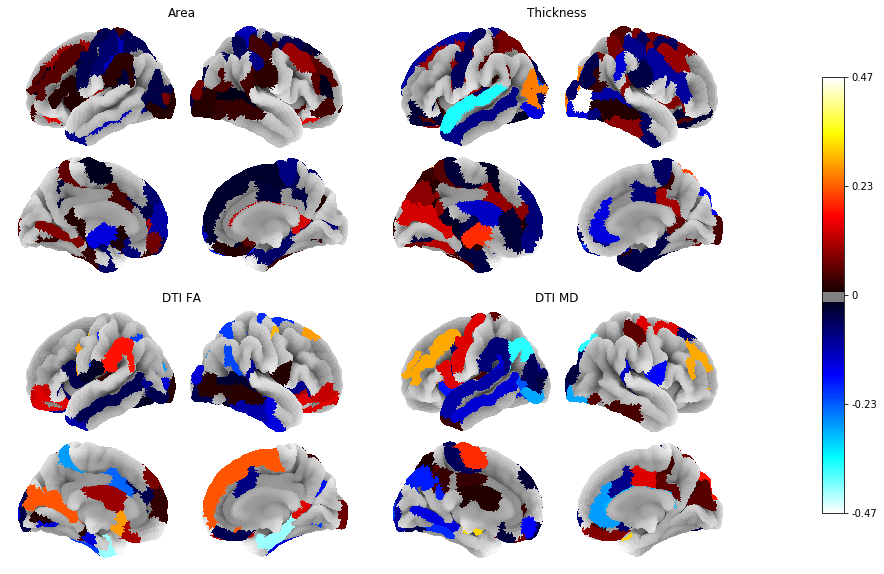

In [6]:
# You put in the grid you want to plot as... e.g., for 2x2
data = [[all_surfs[0], all_surfs[1]],
        [all_surfs[2], all_surfs[3]]]

# Same w/ titles
titles = [['Area', 'Thickness'], ['DTI FA', 'DTI MD']]

# You can pass any of the base plotting params also
Collages(data,
         inflate=False,
         fs_avg=fs_avg,
         titles=titles,
         figsize=(15,10),
         outer_wspace=.1,
         outer_hspace=.1,
         vmin=None, # If you leave these as None, it will set as the global min/max symmetric for all passed in surfs
         vmax=None,
         midpoint=None,
         threshold=.01,
         avg_method='median',
         cmap='cold_hot',
         cbar_2_fig_ratio=.25, # Ratio between size of chunk of 4 brains w/ color bar
         cbar_fraction=.25, # % of the colorbar box the colorbar should take-up
         cbar_shrink=1, # Scaling on the colorbar, so <1 makes it smaller, >1, bigger
         cbar_aspect=20) # Ratio of colorbar height to width

plt.savefig('multi_collage_example.png', dpi=200) # dpi higher = can zoom in better, ect...

## Single collage example

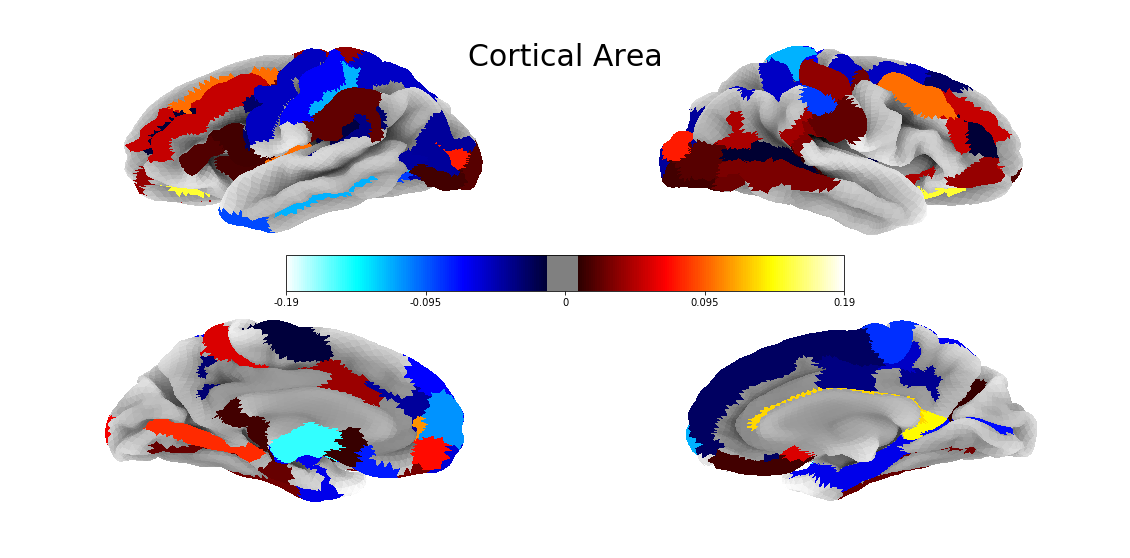

In [9]:
base_surf_collage(all_surfs[0],
                  inflate=False,
                  fs_avg=fs_avg,
                  title='Cortical Area',
                  colorbar=True,
                  cmap='cold_hot',
                  threshold=.01,
                  avg_method='median',
                  vmin=None,
                  vmax=None,
                  midpoint = 0,
                  title_y_adjust=.05, # How far down from the top the title is displayed
                  dist = 8, # How zoomed in each brain is displayed, below 6 starts to cut off
                  figsize=(20, 10))

plt.savefig('single_collage_example.png', dpi=200)